In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from matplotlib.lines import Line2D
import plotly.express as px

# Read Data

First, let's convert the csv files to pandas dataframes so we can plot them later.

In [3]:
pacers = pd.read_csv('pacers_results_four_factors.csv')
league = pd.read_csv('league_avg_four_factors.csv')
pacers[pacers.columns[2:]] = pacers[pacers.columns[2:]].multiply(100) #convert decimals to percentages 
league[league.columns[1:]] = league[league.columns[1:]].multiply(100)
pacers.head()

,game_date,win,efg_pct,opp_efg_pct,oreb_pct,opp_oreb_pct,tov_pct,opp_tov_pct,ftm_rate,opp_ftm_rate
0,2/8/2023,False,58.3,50.6,17.4,34.9,11.6,13.7,25.641026,45.569620
1,1/20/2023,False,48.8,69.9,43.1,32.4,20.6,18.0,34.523809,21.686747
2,1/29/2023,False,51.3,53.4,36.4,40.4,19.8,9.9,24.050633,19.101124
3,3/25/2023,False,61.5,63.0,36.4,48.8,16.7,12.7,12.500000,22.916667
4,10/31/2022,False,53.4,60.6,33.3,21.1,23.1,19.0,18.390805,23.750000


In [36]:
type(league['efg_pct'])

pandas.core.series.Series

After creating a scatterplot measuring the Pacers' four factors vs their opponents' four factors, where each game is marked as a win or a loss, we can interpret the graphs by considering each quadrant of the graph. The 2 lines that create the quadrants are simply the `league average` for the statistic. Therefore, for example, we can interpret `quadrant II`, or the top left quadrant, as the games where the Pacers had a **below average** game in that certain factor, while their opponent had an **above average** game in that factor. 

Noting this, it makes sense to only take a look at `quadrant II` and `quadrant IV`, or the bottom right quadrant, to see which of the four factors is most important in indicating success, since `quadrant I` indicates the games where both the Pacers and their opponents did well, and `quadrant III` indicates the games where both the Pacers and their opponents did poorly. 

For `quadrant II`, if the factor is a good predictor of team success, then most of the games should be losses, since the Pacers did poorly in that factor while their opponents performed above average. For `quadrant IV`, we would want most of the games to be wins on the contrary, since the Pacers outperformed league average, while their opponents were below league average.



In [63]:
def plot(stat):
    '''
    Creates matplotlib scatterplot of Pacers vs Opponent with each datapoint marked by win/loss for certain statistic specified,
     with quadrants marked by league average. Additionally calculates Loss % of games in Quadrant II and Win% of games in Quadrant IV
    '''
    fig, ax = plt.subplots()
    scatter = plt.scatter(x = pacers[stat], y = pacers[f'opp_{stat}'], c = pacers['win'], cmap = 'bwr', alpha = 0.5) #create scatter plot

    # Create a custom legend
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Loss'),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Win')]

    # Add the legend to the plot
    legend = ax.legend(handles=legend_elements, title='Win Status')

    # Set labels for x and y axes
    ax.set_xlabel(stat)
    ax.set_ylabel(f'Opponent {stat}')

    league_avg = float(league[stat].iloc[0])
    # Add quadrants
    ax.axhline(y=float(league_avg), color='black', linestyle='-') 
    ax.axvline(x=float(league_avg), color='black', linestyle='-')  

    # Add league average effective field goal percentage
    #ax.axhline(y = league['efg_pct'], color = 'black', linestyle = '--')

    # Normalize both axes
    ax.set_xlim(min(pacers[stat]-2), max(pacers[stat]+2))
    ax.set_ylim(min(pacers[stat]-2), max(pacers[stat]+2))
    ax.set_title(f"2022-2023 Pacers Performance: {stat} vs Opponent {stat}, League Average Quadrants, Win/Loss Highlighted")
    plt.show()


    quadrant_2_count = sum((pacers[f'opp_{stat}'] > league_avg) & (pacers[stat] < league_avg))
    quadrant_2_loss = sum((pacers[f'opp_{stat}'] > league_avg) & (pacers[stat] < league_avg) & (pacers['win'] == False))
    quadrant_4_count = sum((pacers[f'opp_{stat}'] < league_avg) & (pacers[stat] > league_avg))
    quadrant_4_win = sum((pacers[f'opp_{stat}'] < league_avg) & (pacers[stat] > league_avg) & (pacers['win'] == True))

    print('Quadrant 2 Loss Percentage: ', 100 * (quadrant_2_loss / quadrant_2_count))
    print('Quadrant 4 Win Percentage: ', 100 * (quadrant_4_win / quadrant_4_count))

# Effective Field Goal %

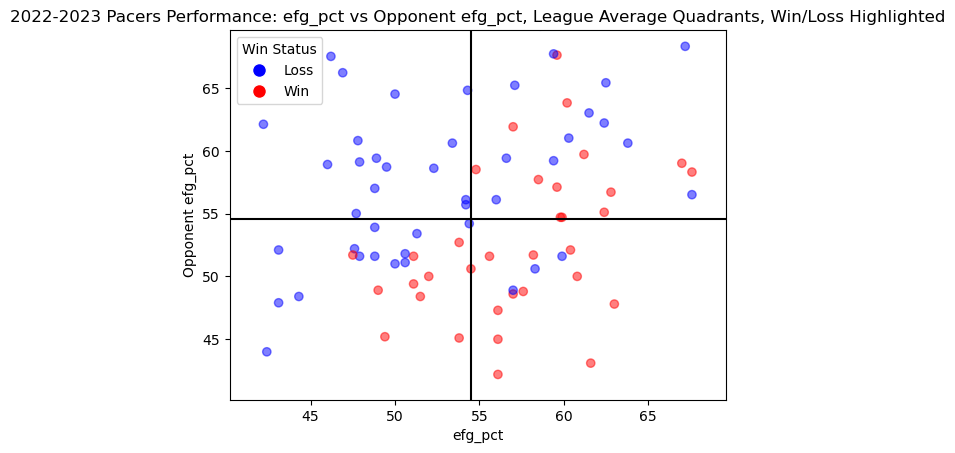

Quadrant 2 Loss Percentage:  100.0
Quadrant 4 Win Percentage:  78.57142857142857


In [65]:
plot('efg_pct')

# Offensive Rebound %

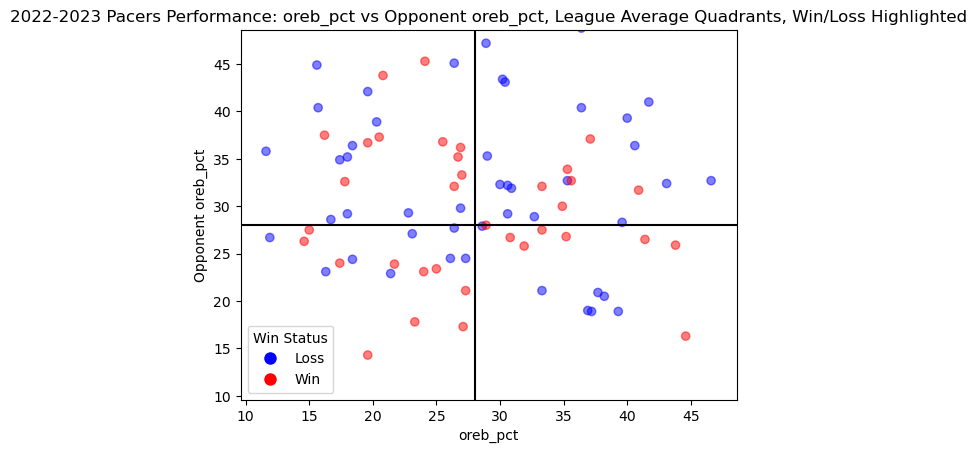

Quadrant 2 Loss Percentage:  56.00000000000001
Quadrant 4 Win Percentage:  53.333333333333336


In [66]:
plot('oreb_pct')

# Turnover %

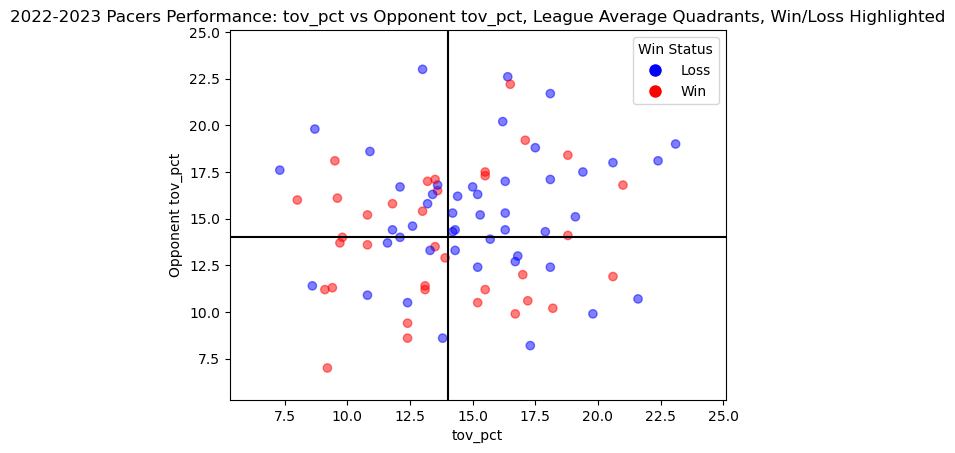

Quadrant 2 Loss Percentage:  52.63157894736842
Quadrant 4 Win Percentage:  43.75


In [67]:
plot('tov_pct')

# Free Throws Made Rate (%)

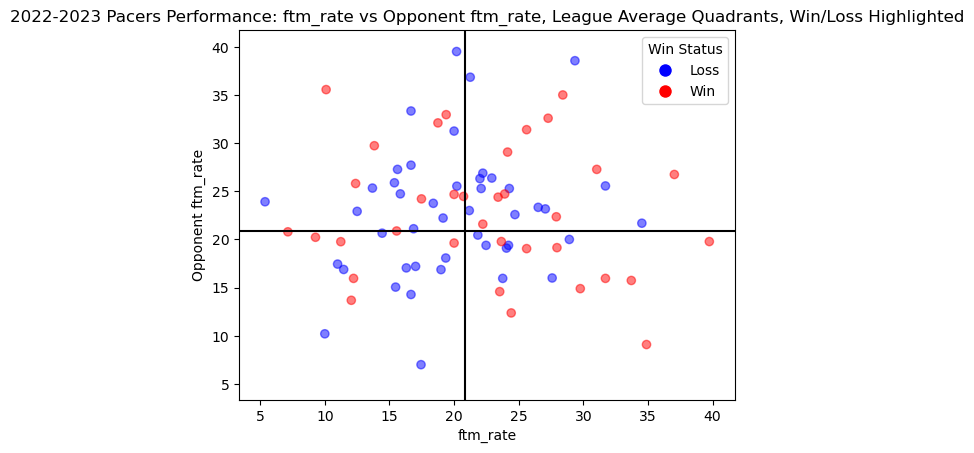

Quadrant 2 Loss Percentage:  60.86956521739131
Quadrant 4 Win Percentage:  58.82352941176471


In [68]:
plot('ftm_rate')

# Conclusion

Just visually, we can see that eFG% is the best indicator of team success, since all of the Pacers' wins occur in Quadrant I, III, and IV, where the Pacers either had above average efficiency, held their opponent to below average efficiency, or both. But more analytically, we see that `Quadrant II`'s percentage of games that were losses is 100%, and `Quadrant IV`'s percentage of games that were wins is around 78.57%. Both are the highest percentages among the other factors, indicating the ***effective field goal percentage*** is the most important of the factors the Pacers' success **and** failure. 